<a href="https://colab.research.google.com/github/Jyotibaberwal/Matrix-computation-for-data-science/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
**Write a function to implement the Power method for any given square matrix of
arbitrary size. Using the function, find the dominant eigenvalue and
corresponding eigenvector for the following matrices**

**a. [[8,-6,2],[-6,7,-4],[2,-4,3]]**

**b. A randomly generated symmetric matrix of size nxn**

**Take the initial vector as [1,1,...,1]T and terminate the iteration if the
consecutive iteration values are very close or after maximum iterations.**

**Reference Reading -** https://ergodic.ugr.es/cphys/lecciones/fortran/power_method.pdf

In [ ]:
import numpy as np

# Randomly genrate symmentric matrix
def random_matrix(n):
  mat = np.random.rand(n,n)
  symmetric_mat = (mat+mat.T)/2
  return symmetric_mat

# Power iteration method with scaling
def X(m, A):
    n = len(A)
    x = np.ones(n)
    max_val = None

    for _ in range(m):
        x = np.dot(A, x)   ## x  = Ax
        max_val = np.max(x)
        x /= max_val

    return x, max_val


A = np.array([[8, -6, 2],
              [-6, 7, -4],
              [2, -4, 3]])

for i in range(10):
    X_vector, max_val = X(i, A)
    print("iteration",i)
    print("eigen_vecotr", X_vector)
    print("eigen_value", max_val)
    print("\n")

print("\n\n\n")
print("For symmetric matrix\n")
for i in range(10):

    X_vector, max_val = X(i, random_matrix(3))
    print("iteration",i)
    print("eigen_vecotr", X_vector)
    print("eigen_value", max_val)
    print()



# Question 2
**(PageRank problem) Assume that a Web contains 6 pages only. The author of
Page 1 thinks pages 2, 4, 5, and 6 have good content, and links to them. The
author of Page 2 only likes pages 3 and 4 so only links from her page to them.
The links between these and the other pages in this web are summarized in the
following diagram.**
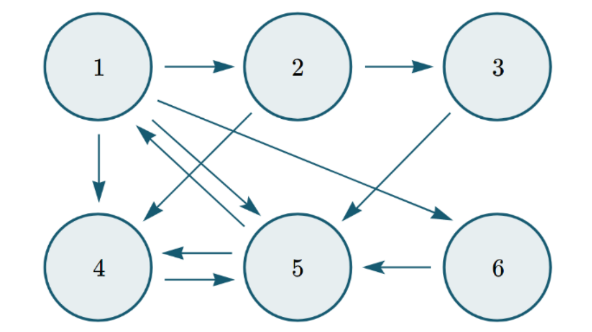



**Find out which page among all six will appear at the top of the search results.**

  **Hint:**

  **a. Compute the associated matrix to the above system.**

  **b. Find the maximum eigenvalue of the associated matrix.**

  **c. Find the corresponding eigenvector to the maximum eigenvalue.**

  **d. The component with maximum magnitude in the eigenvector will have the highest rank.**

**Use the function from problem 1 to find the max eigenvalue and corresponding eigenvector. Also, look for any use case or real-life problem where one mightcare to find the highest eigenvalue.**




In [ ]:

def X(m, A):
    n = len(A)
    x = np.array([1/n]*n)
    max_val = None

    for _ in range(m):
        x = np.dot(A, x)
        max_val = np.max(x)
        x /= max_val

    return x, max_val


A = np.array([[0,0,0,0,1/2,0],
              [1/4,0,0,0,0,0],
              [0,1/2,0,0,0,0],
              [1/4,1/2,0,0,1/2,0],
              [1/4,0,1,1,0,1],
              [1/4,0,0,0,0,0]])

'''for i in range(20):
    X_vector, max_val = X(i, A)
    print("iteration",i)
    print("eigen_vecotr", X_vector)
    print("eigen_value", max_val)
    print("\n")
'''
m = 10
page_rank,eigen_Value = X(m,A)


print("page_rank",page_rank)
print("highest_page_rank",np.argmax(page_rank)+1)


page_rank [0.51073303 0.12401042 0.0645778  0.69932125 1.         0.12401042]
highest_page_rank 5


# Question 3
**Given a simple quadratic optimization problem of the form:

 **![](https://latex.codecogs.com/svg.image?\bg{white}&space;f(x)=ax^2&plus;bx&plus;c)**

where a, b, and c are constants. Find the value of x that minimizes f (x).**

**a. Implement the gradient descent algorithm to minimize the above quadratic
function.**

**b. Extend the implementation to include L1 and L2 norms as regularization
terms, resulting in the following objective functions:**

**a.) (L1 - Regularization)**

**b.) (L2 - Regularization)**

**where λ is a regularization term.**

**c. Compare the convergence rates (i.e., how quickly the algorithm finds the
minimum) for the three objective functions (original, L1- regularized, and
L2-regularized).**

**d. Analyze the differences in the solutions obtained for different values of λ
in the regularized cases.**

**e. Discuss the findings and insights into how different norms affect the
optimization process.**

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# f(x) = ax^2 + bx + c
def quadratic_eq(a, b, c, x):
    return a * x**2 + b * x + c

def gradient_f(x, a, b):
    return 2 * a * x + b

def gradient_descent(a, b, c, l_r, epochs):
    x = 0  # initial guess
    x_values = []
    f_x_values = []  # f(x) for x
    for i in range(epochs):
        gradient = gradient_f(x, a, b)
        x = x - l_r * gradient
        x_values.append(x)
        f_x_values.append(quadratic_eq(a,b,c,x))
    return x_values, f_x_values, x

a,b,c = 2,-5,3
lr = 0.1
epochs = 100
x_values, f_x_values, converged_x = gradient_descent(a, b, c, lr, epochs)

# Print the converged value of x
print("Converged value of x:", converged_x)

'''
# Plotting
x_range = np.linspace(-4, 4, 1000)
y_values = quadratic_eq(a, b, c, x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_values, label='Quadratic Equation')
plt.scatter(x_values, f_x_values, color='red', label="Optimization")
plt.scatter(converged_x, quadratic_eq(a, b, c, converged_x), color='green', label="Converged Point", marker='o', s=100)
plt.title('Optimization with Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
'''

Converged value of x: 1.2499999999999998


'\n# Plotting\nx_range = np.linspace(-4, 4, 1000)\ny_values = quadratic_eq(a, b, c, x_range)\n\nplt.figure(figsize=(10, 6))\nplt.plot(x_range, y_values, label=\'Quadratic Equation\')\nplt.scatter(x_values, f_x_values, color=\'red\', label="Optimization")\nplt.scatter(converged_x, quadratic_eq(a, b, c, converged_x), color=\'green\', label="Converged Point", marker=\'o\', s=100)\nplt.title(\'Optimization with Gradient Descent\')\nplt.xlabel(\'x\')\nplt.ylabel(\'f(x)\')\nplt.legend()\nplt.grid(True)\nplt.show()\n'

In [36]:
## Implementation of L1,L2 norm as regularization terms
##  f(x)_l1 = ax^2 + bx + c + λ|x|  (L1-Regularization)
## f(x)_l2 = ax^2 + bx + c + λ||x||^2 (l2- Regularization)

def f_l1(x,a,b,c,lambda_1):
  f_x = a*(x**2) + b*x + c + lambda_1*np.abs(x)
  return f_x

def f_l2(x,a,b,c,lambda_2):
  f_x = a*(x**2) + b*x + c + lambda_2*(x**2)
  return f_x

def grad_descent_norm(a,b,c,l_r,epochs,lambda_reg,regularization):
  x = 0  ## initial guess
  for i in range(epochs):
    if regularization == 'l1':
      grad = 2*a*x + b + lambda_reg*np.sign(x)    ## f'(x) of l1 regularization
    elif regularization == 'l2':
      grad = 2*a*x + b + 2*lambda_reg*x      ## f'(x) of l2 regularization
    x = x - l_r*grad
  return x


a,b,c = 2,-5,3
l_r = 0.1
epochs = 100
lambda_1 = 0.1
lambda_2 = 0.1

# def gradient_descent(a, b, c, l_r, epochs):
x_values, f_x_values, converged_x = gradient_descent(a, b, c, l_r, epochs)
print("minimum value by gradient descent : ",converged_x)

## minimum value with the help of l1 norm
x_min_l1 = grad_descent_norm(a,b,c,l_r,epochs,lambda_1,'l1')
print("\nminimum value by l1 norm : ",x_min_l1)

# minimum value with the help of l2 norm
x_min_l2 = grad_descent_norm(a,b,c,l_r,epochs,lambda_2,'l2')
print("\nminimum value by l2 norm : ",x_min_l2)


minimum value by gradient descent :  1.2499999999999998

minimum value by l1 norm :  1.2249999999999999

minimum value by l2 norm :  1.1904761904761902


As we can see from above results l1 regularization converges first as compared to l2 norm


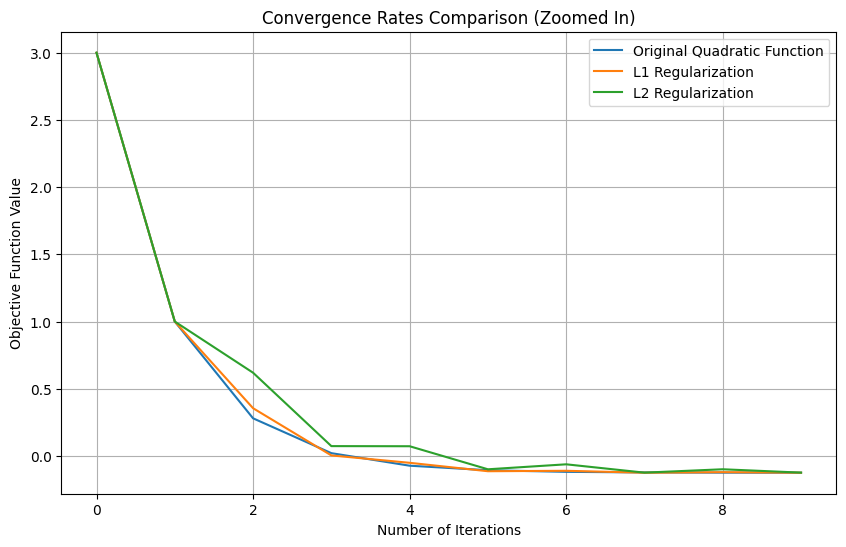

In [41]:
###  comparing convergence rate  ##
import numpy as np
import matplotlib.pyplot as plt

def quadratic_eq(a, b, c, x):
    return a * x**2 + b * x + c

def grad_f(x, a, b):
    return 2 * a * x + b

# Gradient descent algorithm
def gradient_descent(a, b, c, l_r, epochs):
    x = 0  # Initial guess
    f_values = []
    for i in range(epochs):
        f_value = quadratic_eq(a, b, c, x)
        gradient = grad_f(x, a, b)
        x = x - l_r * gradient
        f_values.append(f_value)
    return f_values

# L1 regularized gradient
def f_l1(x, a, b, c, lambda_l1):
    f_x = a * x**2 + b * x + c + lambda_l1 * np.abs(x)
    return plt.fill_betweenx

# L2 regularized gradient
def f_l2(x, a, b, c, lambda_l2):
    f_x =  a * x**2 + b * x + c + lambda_l2 * x**2
    return f_x

# Gradient descent algorithm for regularized  functions
def grad_descent_norm(a,b,c,l_r,epochs,lambda_reg,regularization):
    x = 0  # Initial guess
    f_values = []
    for i in range(epochs):
        if regularization == 'L1':
            grad = 2*a*x + b + lambda_reg*np.sign(x)    ## f'(x) of l1 regularization
        elif regularization == 'L2':
            grad = 2*a*x + b + 2*lambda_reg*x      ## f'(x) of l2 regularization
        f_value = quadratic_eq(a, b, c, x)
        x = x - l_r * grad
        f_values.append(f_value)
    return f_values

a = 2
b = -5
c = 3
lr = 0.4
epochs = 10
lambda_l1 = 0.1
lambda_l2 = 0.1

# Compute convergence rates for the original, L1-regularized, and L2-regularized objective functions
f_values_original = gradient_descent(a, b, c, lr, epochs)
f_values_l1 = grad_descent_norm(a, b, c, lr, epochs, lambda_l1, 'L1')
f_values_l2 = grad_descent_norm(a, b, c, lr, epochs, lambda_l2, 'L2')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), f_values_original, label='Original Quadratic Function')
plt.plot(range(epochs), f_values_l1, label='L1 Regularization')
plt.plot(range(epochs), f_values_l2, label='L2 Regularization')
plt.title('Convergence Rates Comparison')
plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()
